In [78]:
import os
import ee
import datetime

import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.relativedelta import relativedelta

ee.Initialize()

In [67]:
data = {}

# ET data
data['modis'] = [ee.ImageCollection('MODIS/006/MOD16A2'), "ET", 0.1]
data['gldas'] = [ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H'), 'Evap_tavg', 86400]
data['nldas'] = [ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H'), 'Evap_tavg', 1]
data['terra'] = [ee.ImageCollection('IDAHO_EPSCOR/TERRACLIMATE'), "aet", 0.1]
data['gmet'] = [ee.ImageCollection('IDAHO_EPSCOR/GRIDMET'), "etr", 1]

# P data
data['trmm']  =  [ee.ImageCollection('TRMM/3B42'), "precipitation", 86400]
data['prism'] = [ee.ImageCollection("OREGONSTATE/PRISM/AN81m"), "ppt", 1]
data['chirps'] = [ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD'), "precipitation", 1]
data['persia'] = [ee.ImageCollection("NOAA/PERSIANN-CDR"), "precipitation", 1]

In [273]:
# HUC 4s draining to the CV 
cv = gp.read_file("../shape/cv_hu6.shp")
lls = cv.geometry.iloc[0]
x,y = lls.exterior.coords.xy
coords = [list(zip(x,y))]

# PARAMS
area = ee.Geometry.Polygon(coords)
scale = 4000
year = 2012

In [70]:
def asdf(col, year, month, var, resolution, scaling_factor):
    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).sum()
    out = t.multiply(1e-3).multiply(ee.Image.pixelArea().multiply(scaling_factor))
    asdf = out.reduceRegion(ee.Reducer.sum(), area, scale)
    info = asdf.getInfo()
    return info[var]


In [ ]:
data['prism'][0].filter(ee.Filter.calendarRange(2008, 2008, 'year')).filter(ee.Filter.calendarRange(month, month, 'month'))

In [108]:
c = data['prism'][0].filter(ee.Filter.calendarRange(2008, 2008, 'year'))
scale = c.select("ppt").first().projection().nominalScale().getInfo()


In [381]:
dataset = data['modis']
# dataset = data['prism']
# dataset = data['gmet']

col = dataset[0]
var = dataset[1]
scaling_factor = dataset[2]

c1 = col.filterBounds(area).select(var)
date1 = c1.filter(ee.Filter.calendarRange(2013,2013,'year'))
date2 = date1.filter(ee.Filter.calendarRange(8,8,'month')).sum()
scaled = date2.multiply(1e-3).multiply(scaling_factor).multiply(ee.Image.pixelArea()) 
# (1) mm to m (2) scaling factor (3) pixel areas (elementwise multiplication of images)

pixel_res = date2.projection().nominalScale().getInfo()
# pixel_res = 500

stats = scaled.reduceRegion(reducer = ee.Reducer.sum(),
  geometry = area,
  scale = pixel_res)

p = stats.getInfo()[var]

In [384]:
def monthly_sum(dataset, year, month):
    
    col = dataset[0]
    var = dataset[1]
    scaling_factor = dataset[2]

    c1 = col.filterBounds(area).select(var)
    date1 = c1.filter(ee.Filter.calendarRange(year,year,'year'))
    date2 = date1.filter(ee.Filter.calendarRange(month,month,'month')).sum()
    scaled = date2.multiply(1e-3).multiply(scaling_factor).multiply(ee.Image.pixelArea()) 
    # (1) mm to m (2) scaling factor (3) pixel areas (elementwise multiplication of images)

    pixel_res = date2.projection().nominalScale().getInfo()
    # pixel_res = 500

    stats = scaled.reduceRegion(reducer = ee.Reducer.sum(),
      geometry = area,
      scale = pixel_res)

    s = stats.getInfo()[var]
    
    return s

In [388]:
p_sums = []
et_sums = []
years = range(2001, 2018)
months = range(1,13)

In [ ]:
for i in years:
    print(i)
    for j in months:
        p_sums.append(monthly_sum(data['prism'], i, j))
        time.sleep(10)
#         et_sums.append(monthly_sum(data['gmet'], i, j))

2001


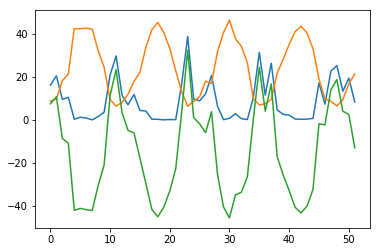

In [398]:
plt.plot(np.array(p_sums) * 1e-9)
plt.plot(np.array(et_sums) * 1e-9)
plt.plot(np.array(p_sums)* 1e-9 - np.array(et_sums) * 1e-9)

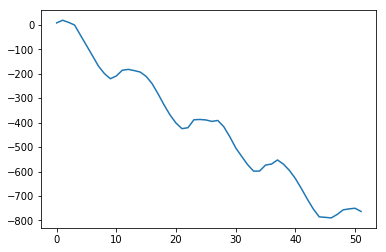

In [399]:
plt.plot(np.cumsum(np.array(p_sums)* 1e-9 - np.array(et_sums) * 1e-9))

In [400]:
12*18

216

In [382]:
p* 1e-9

4.660780840290184

In [380]:
p* 1e-9

40.48314860744277

In [378]:
p* 1e-9

0.3901947829915163

In [377]:
p* 1e-9

0.3901947829915163

In [375]:
p* 1e-9

0.4224177223701128

In [373]:
p* 1e-9

2.7270102805483742

In [371]:
p* 1e-9

5.318129740851

In [369]:
p* 1e-9

3.102699156977143

In [332]:
info = date1.getInfo()

In [333]:
info

{'type': 'ImageCollection',
 'bands': [],
 'id': 'MODIS/006/MOD16A2',
 'version': 1550689431991310,
 'properties': {'date_range': [978307200000.0, 1548374400000.0],
  'period_mapping': [978307200000.0,
   1009843200000.0,
   1009843200000.0,
   1041379200000.0,
   1041379200000.0,
   1072915200000.0,
   1072915200000.0,
   1104537600000.0,
   1104537600000.0,
   1136073600000.0,
   1136073600000.0,
   1167609600000.0,
   1167609600000.0,
   1199145600000.0,
   1199145600000.0,
   1230768000000.0,
   1230768000000.0,
   1262304000000.0,
   1262304000000.0,
   1293840000000.0,
   1293840000000.0,
   1325376000000.0,
   1325376000000.0,
   1356998400000.0,
   1356998400000.0,
   1388534400000.0,
   1388534400000.0,
   1420070400000.0,
   1420070400000.0,
   1451606400000.0,
   1451606400000.0,
   1483228800000.0,
   1483228800000.0,
   1514764800000.0,
   1514764800000.0,
   1546300800000.0,
   1546300800000.0,
   1548374400000.0],
  'period': 8.0,
  'system:visualization_0_min': '0.0',
 

In [350]:
d = date1.filter(ee.Filter.calendarRange(9,9,'month'))

In [351]:
asdf = d.getRegion(area,pixel_res)

In [352]:
inf = asdf.getInfo()

In [353]:
arr = array_from_df(df_from_ee_object(inf), "ET")

In [364]:

ets = []


for i in inf[1:]:
    ets.append(i[-1])

In [366]:
np.sum(np.array(ets))

3132

In [318]:
p * 1e-9

0.8384136815855834

In [316]:
p * 1e-9

0.849117221943472

In [313]:
p * 1e-9

0.7992825881433352

In [309]:
p * 1e-9

0.49372572272840803

In [314]:
scale

111319.49079327357

In [302]:
p * 1e-9

5.876911921032488

In [303]:
scale

111319.49079327357

In [213]:
var = "ppt"
scaling_factor = 1
# scale = 5000
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

c1 = col.filterBounds(area).select(var)
date1 = c1.filter(ee.Filter.calendarRange(2014,2014,'year'))
date2 = date1.filter(ee.Filter.calendarRange(4,4,'month')).median().multiply(1e-3) # mm to m



fin = date2.multiply(scaling_factor) # scaling factor for each dataset 

scale = reduced.projection().nominalScale().getInfo()
a = ee.Image.pixelArea()
t1 = date2.first().multiply(ee.Image.pixelArea()).multiply(scaling_factor)

out1 = t1.reduceRegion(ee.Reducer.sum(), area, scale)
out2 = t1.reduceRegion(ee.Reducer.sum(), area, scale)

out3 = date2.getRegion(area, scale)
out4 = date2.getRegion(area, scale)


EEException: Required argument (image2) missing to function: Selects the value of the first value for each matched pair of bands in
image1 and image2. If either image1 or image2 has only 1 band, then it is
used against all the bands in the other image. If the images have the same
number of bands, but not the same names, they're used pairwise in the
natural order. The output bands are named for the longer of the two inputs,
or if they're equal in length, in image1's order. The type of the output
pixels is the union of the input types.

Args:
  image1: The image from which the left operand bands are taken.
  image2: The image from which the right operand bands are taken.

In [216]:
date1 = c1.filter(ee.Filter.calendarRange(2014,2014,'year'))


In [218]:
info = date1.getInfo()

dict_keys(['type', 'bands', 'id', 'version', 'properties', 'features'])

In [232]:
info['features'][0]

{'type': 'Image',
 'bands': [{'id': 'ppt',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [1405, 621],
   'crs': 'GEOGCS["NAD83", \n  DATUM["North_American_Datum_1983", \n    SPHEROID["GRS_1980", 6378137.0, 298.257222101]], \n  PRIMEM["Greenwich", 0.0], \n  UNIT["degree", 0.017453292519943295], \n  AXIS["Longitude", EAST], \n  AXIS["Latitude", NORTH]]',
   'crs_transform': [0.04166666666667,
    0.0,
    -125.02083333333333,
    0.0,
    -0.04166666666667,
    49.93750000000203]}],
 'id': 'OREGONSTATE/PRISM/AN81m/201401',
 'version': 1509052518666813,
 'properties': {'PRISM_DATASET_FILENAME': ['adj_best_ppt_us_us_30s_201401.bil',
   'cai_tmin_us_us_30s_201401.bil, cai_tmax_us_us_30s_201401.bil',
   'cai_tmin_us_us_30s_201401.bil',
   'cai_tmax_us_us_30s_201401.bil',
   'cai_tdmean_us_us_30s_201401.bil',
   'cai_vpdmin_us_us_30s_201401.bil',
   'cai_vpdmax_us_us_30s_201401.bil'],
  'PRISM_CODE_VERSION': ['16.1-20161010-1224',
   '14.1-20140502-1000',
   '1

In [ ]:
info['properties']

In [233]:
t = date1.toList(date1.size())

In [236]:
i = t.getInfo()

In [250]:
out = []
for i in range(12):
    print(i)
    res = ee.Image(t.get(i)).reduceRegion(ee.Reducer.sum(), area, scale).getInfo()
    out.append(res['ppt'])

0
1
2


EEException: Earth Engine memory capacity exceeded.

In [259]:
f = ee.Image.pixelArea().getInfo()

In [264]:
f['bands'][0]

{'id': 'area',
 'data_type': {'type': 'PixelType', 'precision': 'float'},
 'crs': 'EPSG:4326',
 'crs_transform': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [252]:
region = date1.getRegion(area, scale)

In [253]:
asdf = region.getInfo()

In [254]:
asdf

[['id', 'longitude', 'latitude', 'time', 'ppt'],
 ['201401', -119.5, 35.5, 1388534400000.0, 0.6459375023841858],
 ['201402', -119.5, 35.5, 1391212800000.0, 11.102656364440918],
 ['201403', -119.5, 35.5, 1393632000000.0, 18.6942195892334],
 ['201404', -119.5, 35.5, 1396310400000.0, 8.433124542236328],
 ['201405', -119.5, 35.5, 1398902400000.0, 0.07625000178813934],
 ['201406', -119.5, 35.5, 1401580800000.0, 0.0],
 ['201407', -119.5, 35.5, 1404172800000.0, 0.0],
 ['201408', -119.5, 35.5, 1406851200000.0, 0.0],
 ['201409', -119.5, 35.5, 1409529600000.0, 0.0],
 ['201410', -119.5, 35.5, 1412121600000.0, 0.0],
 ['201411', -119.5, 35.5, 1414800000000.0, 13.959688186645508],
 ['201412', -119.5, 35.5, 1417392000000.0, 48.95343780517578],
 ['201401', -118.5, 35.5, 1388534400000.0, 11.432499885559082],
 ['201402', -118.5, 35.5, 1391212800000.0, 27.733125686645508],
 ['201403', -118.5, 35.5, 1393632000000.0, 56.02781295776367],
 ['201404', -118.5, 35.5, 1396310400000.0, 51.43172073364258],
 ['2014

In [275]:
a1 = date2.multiply(ee.Image.pixelArea())
stats = a1.reduceRegion(reducer= ee.Reducer.sum(),
  geometry= area,
  scale= scale)
p = stats.getInfo()['ppt']

In [276]:
stats = a1.reduceRegion(reducer= ee.Reducer.sum(),
  geometry= area,
  scale= scale)

In [278]:
p = stats.getInfo()['ppt']

In [280]:
p * 1e-3 

7112768.746752743

In [205]:
arr = array_from_df(df_from_ee_object(out3.getInfo()), "ppt")

In [210]:
arr.sum() * 1000 **2

9103023000000.0

In [207]:
arr2 = array_from_df(df_from_ee_object(out4.getInfo()), "ppt")

In [209]:
arr2.sum() * 2000 **2

9106995000000.0

In [211]:
7110606799629.396 - 9106995000000.0

-1996388200370.6035

In [192]:
asdf.getInfo(), scale **2

({'area': 154541447613.74115}, 12392029030.473719)

In [285]:

var = "ppt"
scaling_factor = 1

col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m').filterBounds(area).select(var)
dated = col.filterDate("2014-04-01", "2014-04-29").multiply(ee.Image.pixelArea())
# monthcol = yearcol.filter(ee.Filter.calendarRange(4,4,'month'))
# meters = monthcol
scale = dated.first().projection().nominalScale().getInfo()



result = reduced.reduceRegion(ee.Reducer.sum(),area, scale).getInfo()

AttributeError: 'ImageCollection' object has no attribute 'multiply'

In [282]:
result

{'ppt': 422.66493854384066}

In [ ]:
arr = array_from_df(df_from_ee_object(result), "ppt")
s = np.sum(arr)*scale**2

In [ ]:
plt.title("{}".format(round((s*1e-9),2)))
plt.imshow(arr)
plt.colorbar()

In [132]:
t.pixelArea().getInfo()

AttributeError: 'ImageCollection' object has no attribute 'pixelArea'

In [99]:
area = ee.Geometry.Polygon(coords)
scale = 4000
year = 2012
months = range(1,13)

p_sums = []
et_sums = []

for i in months:
    print(i)
    p_sums.append(asdf(data['prism'][0], 2012, i, data['prism'][1], 100000, data['prism'][2]))
    et_sums.append(asdf(data['gmet'][0], 2012, i, data['gmet'][1], 100000,  data['gmet'][2]))

1
2
3
4
5
6
7
8
9
10
11
12


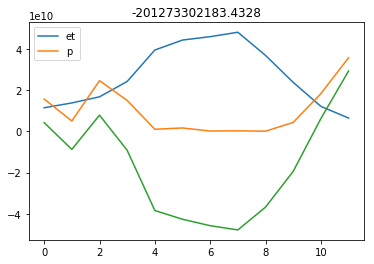

In [96]:
ds = np.array(p_sums) - np.array(et_sums)

plt.title("{}".format(str(np.sum(ds))))
plt.plot(et_sums, label = "et")
plt.plot(p_sums, label = "p")
plt.plot(ds)
plt.legend()


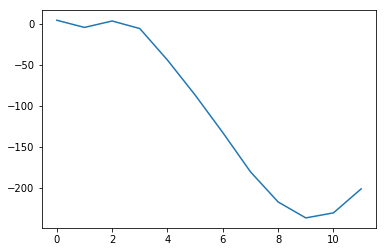

In [97]:
plt.plot(np.cumsum(np.array(p_sums) * 1e-9 - np.array(et_sums) * 1e-9))

In [79]:
# Read in the storage CSVs from the data folder

# find files
data_dir = "../data"
ds_file = [os.path.join(data_dir,x) for x in os.listdir("../data") if "storage" in x][0]
ds = pd.read_csv(ds_file, sep='\t', header=0)

q_file = [os.path.join(data_dir,x) for x in os.listdir("../data") if "Qs" in x][0]
q = pd.read_csv(q_file)

ds.set_index(ds['dt'], inplace = True)
q.set_index(q.columns[0], inplace = True)

# convert to datetime
ds.index = pd.to_datetime(ds.index)
q.index = pd.to_datetime(q.index)

# Change the ds index to be beginning of the month
ds.index += datetime.timedelta(days = 1)

df = pd.DataFrame([])



df['q'] = df.discharge_cms*2.628e+6 # convert cms to cubic m/month
df['p'] = df.prism * 1e-3 # multiply by study area and convert mm to m
df['et'] = df.gridmet*study_area * 1e-3 # multiply by study area and convert mm to m, apply ET scaling factor 
df['s_m3'] = df.s * 1.23348e+9 # convert from million acre ft to cubic m 


In [80]:
ds

,dt,s,region
dt,,,
1973-11-01,1973-10-31T00:00:00Z,4575.555111,Entire CV
1973-12-01,1973-11-30T00:00:00Z,4578.075790,Entire CV
1974-01-01,1973-12-31T00:00:00Z,4581.297108,Entire CV
1974-02-01,1974-01-31T00:00:00Z,4585.170011,Entire CV
1974-03-01,1974-02-28T00:00:00Z,4588.180232,Entire CV
1974-04-01,1974-03-31T00:00:00Z,4591.566945,Entire CV
1974-05-01,1974-04-30T00:00:00Z,4594.298650,Entire CV
1974-06-01,1974-05-31T00:00:00Z,4595.726068,Entire CV
1974-07-01,1974-06-30T00:00:00Z,4596.597452,Entire CV


54.911122292711646
48.21374336224787


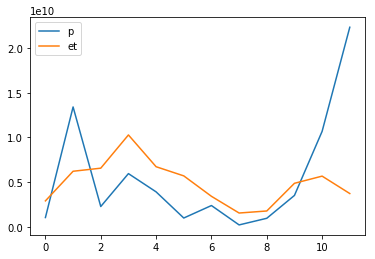

In [64]:
plt.plot(p_sums, label  = "p")
plt.plot(et_sums, label = "et")
plt.legend()
print(np.sum(np.array(p_sums)) * 0.000810714 * 1e-6) # cubic m to MAF 
print(np.sum(np.array(et_sums)) * 0.000810714 * 1e-6 * 0.1) # cubic m to MAF 

In [ ]:
# 2015 AET 

54.911122292711646
172.85413322352363


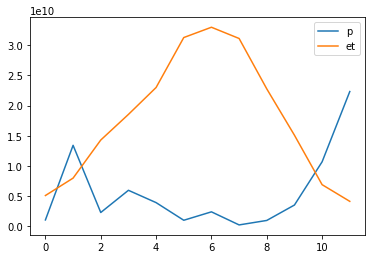

In [60]:
plt.plot(p_sums, label  = "p")
plt.plot([x*0.1 for x in et_sums], label = "et")
plt.legend()
print(np.sum(np.array(p_sums)) * 0.000810714 * 1e-6) # cubic m to MAF 
print(np.sum(np.array(et_sums)) * 0.000810714 * 1e-6 * 0.1) # cubic m to MAF 

66.8441148224882
51.54261143784149


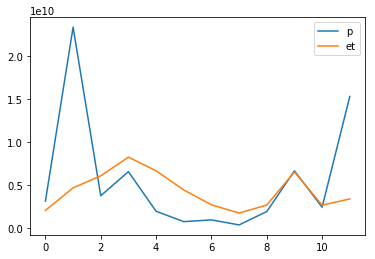

In [54]:
plt.plot(p_sums, label  = "p")
plt.plot([x*0.1 for x in et_sums], label = "et")
plt.legend()
print(np.sum(np.array(p_sums)) * 0.000810714 * 1e-6 * 1.23348) # cubic m to MAF to km^3
print(np.sum(np.array(et_sums)) * 0.000810714 * 1e-6 * 0.1 * 1.23348) # cubic m to MAF to km^3 

27.406776818240118
39.993738709810316


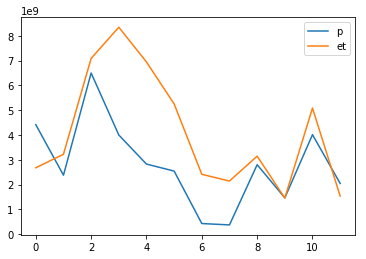

In [39]:
plt.plot(p_sums, label  = "p")
plt.plot([x*0.1 for x in et_sums], label = "et")
plt.legend()
print(np.sum(np.array(p_sums)) * 0.000810714 * 1e-6 * 1.23348) # cubic m to MAF to km^3
print(np.sum(np.array(et_sums)) * 0.000810714 * 1e-6 * 0.1 * 1.23348) # cubic m to MAF to km^3  1.23348e+9

27.406776818240118

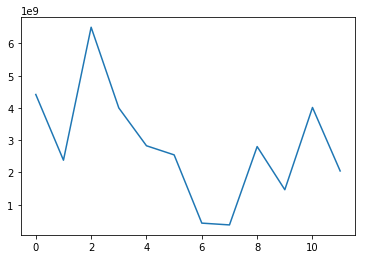

In [24]:
plt.plot(sums)
np.sum(np.array(sums)) * 0.000810714 * 1e-6 # cubic m to MAF 

98.19277550008803

121530614.70351374

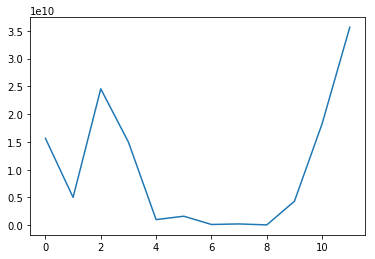

In [17]:
plt.plot(sums)
np.sum(np.array(sums))

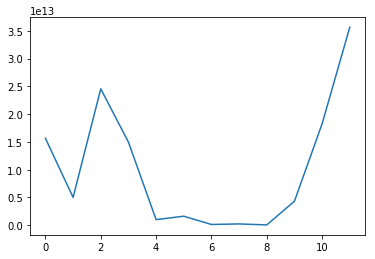

In [12]:
plt.plot(sums)

In [14]:
np.sum(np.array(sums))* 1e-3

121530614703.51352

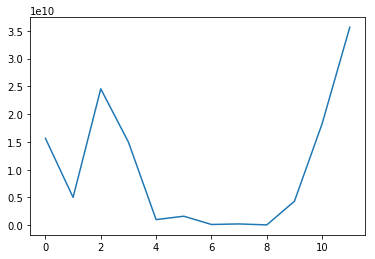

In [8]:
plt.plot(sums)

In [9]:
np.sum(np.array(sums))

121530614703.51373

In [ ]:
year = 2015
month = 4
scale = 1000
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')


In [ ]:
year = 2015
month = 4
scale = 1000
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var)
a = t.getRegion(area, scale).getInfo()
df = df_from_ee_object(a)
arr = array_from_df(df, var)
vols = arr*1e3 * scale**2 # convert to m
total = np.sum(vols)
    
plt.title("{}".format(str(total)))
plt.imshow(arr)
plt.colorbar()


In [ ]:
year = 2015
month = 4
scale = 5000
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var)
a = t.getRegion(area, scale).getInfo()
df = df_from_ee_object(a)
arr = array_from_df(df, var)
vols = arr*1e3 * scale**2 # convert to m
total = np.sum(vols)
    
plt.title("{}".format(str(total)))
plt.imshow(arr)
plt.colorbar()


In [ ]:
year = 2015
month = 4
scale = 4000
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).median()
a2 = t.reduceRegion(ee.Reducer.sum(), area, scale)

info = a2.getInfo()
info['ppt']* 1e-3 * scale **2

In [ ]:
year = 2015
month = 4
scale = 4000
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

def wrap(col, scale, year, month, var):
    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).median()
    a2 = t.reduceRegion(ee.Reducer.sum(), area, scale)

    info = a2.getInfo()
    o = info['ppt']* 1e-3 * scale ** 2
    
    return o



In [ ]:
scales = [1000, 2000, 5000, 10000, 25000]

In [ ]:
res = []
for i in scales:
    res.append(wrap(col, i, year, month, var))

In [ ]:
plt.plot(scales,res)

In [ ]:
year = 2016
month = 8
scale = 10000
var = "ppt"

col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')
t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).median()
v = ee.Image.pixelArea()
out = t.multiply(1e-3).multiply(ee.Image.pixelArea())
asdf1 = out.reduceRegion(ee.Reducer.sum(), area, scale)
info = asdf.getInfo()
info['ppt']


In [ ]:
def asdf(col, year, month, var, scale):
    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).median()
    v = ee.Image.pixelArea()
    out = t.multiply(1e-3).multiply(ee.Image.pixelArea())
    asdf = out.reduceRegion(ee.Reducer.sum(), area, scale)
    info = asdf.getInfo()
    return info['ppt']


In [ ]:
sums = []
months = range(1,13)

for i in months:
    print(i)
    sums.append(asdf(col, 2012, i, "ppt", 25000))

In [ ]:
plt.plot(sums)

In [ ]:
plt.plot(sums)

In [ ]:
plt.plot(sums)

In [ ]:
plt.plot(sums)

In [ ]:
var  = "ppt"
scale = 10000

sums = []
months = range(1,13)
years = range(2000, 2017)

for i in years:
    for i in months:
        sums.append(asdf(col, i, j, var, scale))

In [ ]:
def sum_monthly(month):
    col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')
    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select("ppt").median()
    out = t.multiply(1e-3).multiply(ee.Image.pixelArea())
    asdf = out.reduceRegion(ee.Reducer.sum(), area, 1000)
#     info = asdf.getInfo()
    
    return asdf


In [ ]:
for i in months:
    sums.append(sum_monthly(i))

In [ ]:
sums[-1].getInfo()

In [ ]:
((951971830.8062984 - 953476349.411466) / 951971830.8062984) * 100

In [ ]:
area = ee.Geometry.Polygon(
        [[[-120.29277343749999, 37.319672371647655],
          [-118.51298828124999, 35.13985393638227],
          [-117.10673828124999, 35.552070101618895],
          [-118.46904296874999, 37.73787899128162]]])

year = 2015
month = 4
var = "ppt"
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')

t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var).sum()
r = t.multiply(ee.Image.pixelArea())
info = r.getInfo()
df = df_from_ee_object(info)



In [ ]:
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat().addBands(t)

# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.sum(),
  geometry=area,
  scale=t.projection().nominalScale()
)

# get data into three different arrays
data = np.array((ee.Array(latlon.get("ppt")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))

data


# # get the unique coordinates
# uniqueLats = np.unique(lats)
# uniqueLons = np.unique(lons)

# # get number of columns and rows from coordinates
# ncols = len(uniqueLons)    
# nrows = len(uniqueLats)

# # determine pixelsizes
# ys = uniqueLats[1] - uniqueLats[0] 
# xs = uniqueLons[1] - uniqueLons[0]

# # create an array with dimensions of image
# arr = np.zeros([nrows, ncols], np.float32)

# # fill the array with values
# counter =0
# for y in range(0,len(arr),1):
#     for x in range(0,len(arr[0]),1):
#         if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
#             counter+=1
#             arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner

In [ ]:
t.projection().nominalScale().getInfo()


In [ ]:
year = 2015
month = 4
var = "ppt"
prism = ee.ImageCollection('OREGONSTATE/PRISM/AN81m')
pvar = "ppt"
trmm = ee.ImageCollection("TRMM/3B43V7")
tvar = "precipitation"


In [ ]:
def get_data(col, year, month, var, scale):
    t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var)
    a = t.getRegion(area, scale).getInfo()
    df = df_from_ee_object(a)
    arr = array_from_df(df, var)
    
    return arr
    

In [ ]:
scales = [1000, 5000, 10000, 25000]

trmm_arrs = [get_data(trmm, year, month, tvar, x) for x in scales]
# prism_arrs = [get_data(prism, year, month, pvar, x) for x in scales]

In [ ]:
for i,x in enumerate(trmm_arrs):
    plt.title("scale = {}, shape = {}, {} sum = {}".format(str(scales[i]), str(np.shape(x)[0]), str(np.shape(x)[1]), np.nansum(x)* scales[i]**2))
    plt.imshow(x)
    plt.colorbar()
    plt.axis("off")
    plt.show()

In [ ]:
plt.figure(figsize = (8,4))

plt.plot(scales, [(np.sum(x)*1e-3 * scales[i]**2) for i,x in enumerate(trmm_arrs)])
plt.xlabel("scale")
plt.ylabel("precipitation sum")
plt.show()

In [ ]:
1e-3

In [ ]:
plt.figure(figsize = (8,4))

plt.plot(scales, [np.sum(x) for x in prism_arrs])
plt.xlabel("scale")
plt.ylabel("precipitation sum")
plt.show()

In [ ]:
for i,x in enumerate(prism_arrs):
    plt.title("scale = {}, shape = {}, {} sum = {}".format(str(scales[i]), str(np.shape(x)[0]), str(np.shape(x)[1]), np.nansum(x)))
    plt.imshow(x)
    plt.colorbar()
    plt.axis("off")
    plt.show()

In [ ]:
t = col.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area).select(var)
s = t.sum()

In [ ]:
import ee
ee.Initialize()


collection = col.filterDate('2012-01-01', '2013-05-01')

def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), area)
    return image.set(dict)

withMean = collection.map(setProperty)

asdf = withMean.aggregate_array('NDVI').getInfo()

In [ ]:
asdf

In [ ]:
print(t.reduceRegion(
  reducer: ee.Reducer.sum(),
  geometry: geometry,
  crs: 'EPSG:4326',
#   crsTransform: affine,
#   maxPixels: 1e9
}));

In [ ]:
plt.plot(scales, [np.sum(x) for x in arrs])
plt.xlabel("scale")
plt.ylabel("precipitation sum")
plt.show()

plt.plot(scales, [np.mean(x) for x in arrs])
plt.plot(scales, [np.mean(x) for x in arrs])

In [ ]:
sizes = [x.shape[0] * x.shape[1] for x in arrs]

In [ ]:
sums = [np.sum(x) for x in arrs]

In [ ]:
plt.plot(np.array(sizes) * np.array(sums))

In [ ]:
year = 2012
month = 4
var = "precipitation"
col = ee.ImageCollection('TRMM/3B43V7')


In [ ]:
scales = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12500, 15000]

m_arrs = [get_data(col, year, month, var, x) for x in scales]

In [ ]:
m_arrs

In [ ]:
for i,x in enumerate(m_arrs):
    plt.title("scale = {}, sum = {}".format(str(scales[i]), np.nansum(x)))
    plt.imshow(x)
    plt.show()

In [ ]:
plt.plot(scales, [np.sum(x) for x in m_arrs])
plt.xlabel("scale")
plt.ylabel("precipitation sum")
plt.show()

plt.plot(scales, [np.sum(x) for x in m_arrs])
plt.plot(scales, [np.mean(x) for x in m_arrs])

In [ ]:
[np.sum(x) for x in m_arrs]

In [ ]:
plt.hist(arrs[3])

In [ ]:
plt.title("scale = {}, sum = {}".format(str(scale), np.nansum(sdf)))
plt.imshow(sdf)

In [ ]:
col = ee.ImageCollection('OREGONSTATE/PRISM/AN81m').select('ppt')
t2 = col.filterDate(ee.Date('2013-01-01'),ee.Date('2017-12-31'))
t = t2.filter(ee.Filter.calendarRange(year, year, 'year')).filter(ee.Filter.calendarRange(month, month, 'month')).filterBounds(area)
a = t.getRegion(area, scale)

In [ ]:
info = a.getInfo()

In [ ]:
df = df_from_ee_object(info)

In [ ]:
arr = array_from_df(df, "ppt")

In [ ]:
plt.title("total = {} scale = {}".format(np.nansum(arr),str(scale)))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.title("total = {} scale = {}".format(np.nansum(arr),str(scale)))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.title("total = {} scale = {}".format(np.nansum(arr),str(scale)))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.title(np.nanmean(arr))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.title(np.mean(arr))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.title(np.mean(arr))
plt.imshow(arr)
plt.colorbar()

In [ ]:
plt.imshow(arr)
plt.colorbar()

In [125]:
def df_from_ee_object(imcol):
    df = pd.DataFrame(imcol, columns = imcol[0])
    df = df[1:]
    return(df)

def array_from_df(df, variable):
#     df = df[df.id == str(month)] 
    
    # get data from df as arrays
    lons = np.array(df.longitude)
    lats = np.array(df.latitude)
    data = np.array(df[variable]) # Set var here 
                                              
    # get the unique coordinates
    uniqueLats = np.unique(lats)
    uniqueLons = np.unique(lons)

    # get number of columns and rows from coordinates
    ncols = len(uniqueLons)    
    nrows = len(uniqueLats)

    # determine pixelsizes
    ys = uniqueLats[1] - uniqueLats[0] 
    xs = uniqueLons[1] - uniqueLons[0]

    # create an array with dimensions of image
    arr = np.zeros([nrows, ncols], np.float32)

    # fill the array with values
    counter =0
    for y in range(0,len(arr),1):
        for x in range(0,len(arr[0]),1):
            if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
                counter+=1
                arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner
    
    return arr